In [8]:

import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [9]:
from psikit import Psikit

In [10]:
pk=Psikit(debug=True,threads=1,memory=32)


  Memory set to  29.802 GiB by Python driver.
  Threads set to 1 by Python driver.


In [11]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [12]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571175901707

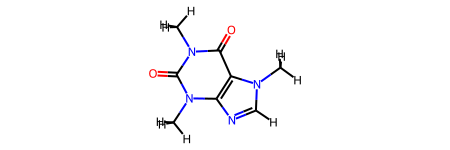

In [13]:
pk.mol

In [14]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20126169  0.07053653  0.08505944 -0.47140626  0.12577513 -0.10083363
  0.36409441 -0.49600907 -0.04595374  0.36252461 -0.52858778  0.02500923
  0.00605392 -0.03375554  0.11036599  0.11036599  0.11036599  0.17305141
  0.05004304  0.05004304  0.05004304  0.06149197  0.06149197  0.06149197]
[-0.1140396  -0.69387155  0.38640952 -0.6228393   0.63497364  0.09325904
  0.89978881 -0.63014376 -0.87904349  1.095669   -0.62724395 -0.87749693
 -0.12040856 -0.12349384  0.129732    0.16727758  0.16726889  0.18241274
  0.16750541  0.14895384  0.14892491  0.14560142  0.14560929  0.17519489]
[-0.13210082 -0.05233702  0.07734818 -0.27543934  0.13961208 -0.12549869
  0.29394269 -0.39450043 -0.18830326  0.34848001 -0.39857904 -0.15250984
 -0.13202198 -0.13825366  0.10404911  0.11675941  0.11778373  0.12133835
  0.11931927  0.10841291  0.10770453  0.10710544  0.10597675  0.12171163]


In [15]:
mol = pk.mol
atoms = mol.GetAtoms()

In [16]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [17]:
df = pd.DataFrame(data)

In [18]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [19]:
df = pd.DataFrame(data)

In [20]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.201,-0.114,-0.132
1,N,0.071,-0.694,-0.052
2,C,0.085,0.386,0.077
3,N,-0.471,-0.623,-0.275
4,C,0.126,0.635,0.140
5,C,-0.101,0.093,-0.125
6,C,0.364,0.900,0.294
7,O,-0.496,-0.630,-0.395
8,N,-0.046,-0.879,-0.188
9,C,0.363,1.096,0.348


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
plt.style.use('ggplot')

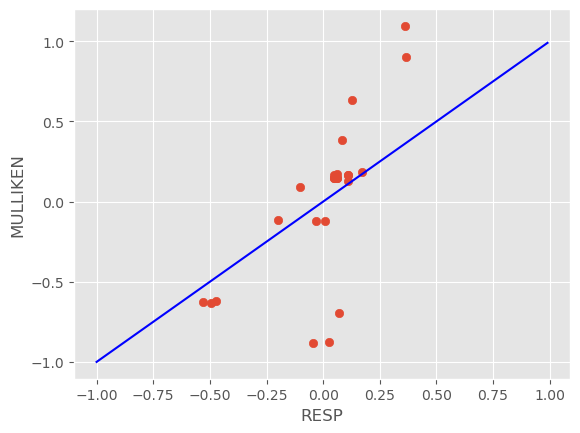

In [23]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

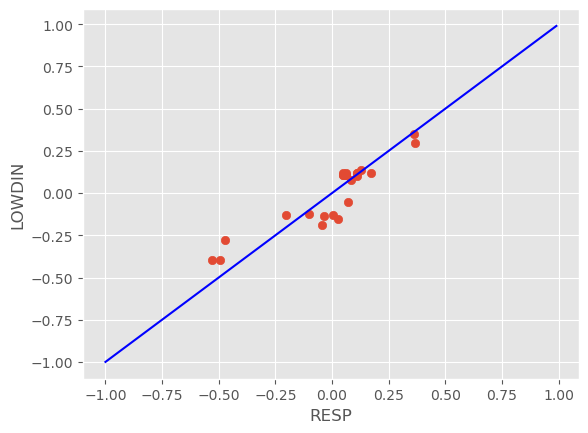

In [24]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

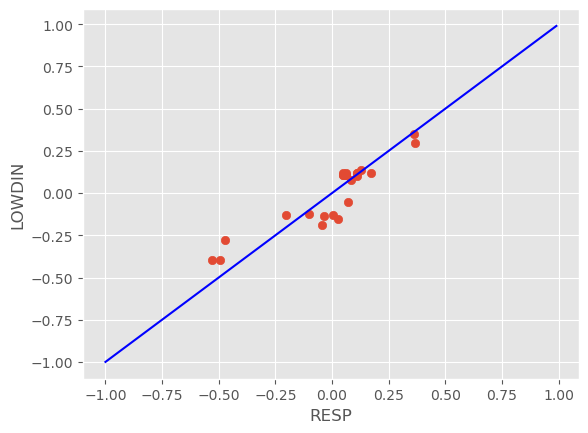

In [25]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

In [ ]:
Analysis : Mulliken charges are atomic charges derived from the Mulliken population analysis, which is based on the partitioning of the electron density in molecular orbitals. These charges are calculated using quantum chemistry methods and give insight into how electron density is distributed across atoms in a molecule.

In a caffeine molecule (C₈H₁₀N₄O₂), Mulliken charges can provide a numerical representation of the partial charges on each atom, reflecting how the molecule's electronic structure affects its polarity and reactivity.

For example:

Nitrogen atoms in the caffeine molecule, being part of the heterocyclic rings, tend to have negative Mulliken charges because of their higher electronegativity.
Carbon atoms bonded to oxygen (e.g., in the carbonyl group) might have positive charges due to electron withdrawal by oxygen.
Hydrogen atoms generally have positive charges due to their low electronegativity.

Charge Comparison in Caffeine:
When comparing Mulliken charges for the different atoms in caffeine, you can assess:

Electron-rich regions: Atoms with negative Mulliken charges (e.g., oxygen or nitrogen).
Electron-deficient regions: Atoms with positive Mulliken charges (e.g., carbons adjacent to electronegative atoms or hydrogens).
Bond Polarity: A larger difference in Mulliken charges between bonded atoms indicates a more polar bond.